In [3]:
% some housekeeping stuff
%register_graphics_toolkit ("notebook");
register_graphics_toolkit ("plotly");
clear
format short e
% end of housekeeping

# Open CO<sub>2</sub>  
Continue pH of rain water calculation  
unknown species: $\mathrm{H^+, OH^-, HCO_3^-, A_2CO_3, CO_3^{2-}}$  
mass action: $\mathrm{Kw, Ka_1, Ka_2, K_H}$  
mass balance: N/A; Not constrained / open system  
charge balance  
$\mathrm{[H^+] = [HCO_3^-] + [OH^-] + 2[CO_3^{2-}]}$  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$\mathrm{[OH^-] \approx 0}$ &nbsp;&nbsp;&nbsp; $\mathrm{[CO_3^{2-}] \approx 0}$  
$\mathrm{[H^+] = [HCO_3^-]}$

$\mathrm{Ka_1 = \frac{[H^+][HCO_3^-]}{[H_2CO_3]} = 10^{-6.3}}$ &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $\mathrm{Ka_2 = \frac{[H^+][CO_3^{2-}]}{[HCO_3^-]} = 10^{-6.3}}$  
$\mathrm{K_H = \frac{[H_2CO_3]}{[P_{CO_2}]} = 10^{-1.5}}$ (if the pressure is in atm units)  
$\mathrm{CO_2(g) + H_2O = H_2CO_3}$

from Ka<sub>1</sub>  
$\mathrm{[HCO_3^-] = \frac{Ka_1[H_2CO_3]}{[H^+]}}$  (sub back into the charge balance)  
$\mathrm{K_H = \frac{[H_2CO_3]}{P_{CO_2}}}$&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $\mathrm{[H_2CO_3] = P_{CO_2}K_H}$  
$\mathrm{[H^+] = \frac{Ka_1 * P_{CO_2} * K_H}{[H^+]}}$  
$\mathrm{[H^+]^2 = Ka_1 * P_{CO_2} * K_H}$  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $= 10^{-6.3}10^{-3.5}10^{-1.5}$  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $=10^{-11.3}$  
$\mathrm{[H^+] = 10^{-5.65}}$  
pH = 5.65  

distribution diagram. "Speciation" for open CO<sub>2</sub>

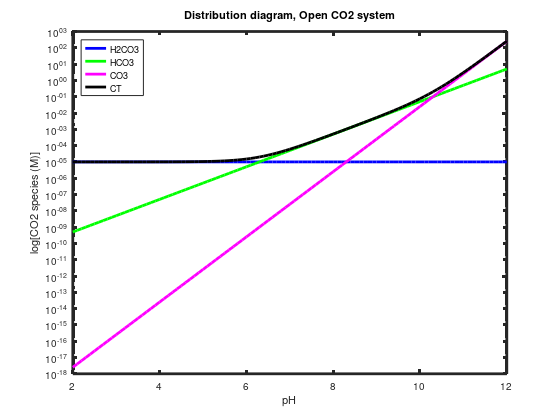

In [4]:
Ka1=10^-6.3;Ka2=10^-10.3;KH=10^-1.5;PCO2=10^-3.5;
pH=2:0.1:12; H=10.^-pH;
H2CO3=KH*PCO2*ones(size(pH));
HCO3=(Ka1*KH*PCO2)./H;
CO3=(Ka1*KH*PCO2*Ka2)./(H.^2);
semilogy(pH,H2CO3,'b','linewidth',2)
hold on
semilogy(pH,HCO3,'g','linewidth',2)
semilogy(pH,CO3,'m','linewidth',2)
semilogy(pH,H2CO3+HCO3+CO3,'k-','linewidth',2)
xlabel('pH'); ylabel('log[CO2 species (M)]');
legend('H2CO3','HCO3','CO3','CT','location','northwest')
set(gca,'linewidth',2);
title('Distribution diagram, Open CO2 system')

$\mathrm{H_2CO_3}$ &nbsp;&nbsp;&nbsp;&nbsp; start from K_H  
$\mathrm{CO_{2(g)} + H_2O \rightleftharpoons H_2CO_3}$  
$\mathrm{K_H = \frac{[H_2CO_3]}{P_{CO_2}}}$  
$\mathrm{[H_2CO_3] = K_H * P_{CO_2}}$&nbsp;&nbsp;&nbsp;&nbsp; no pH dependence  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $\mathrm{= 10^{-1.5}10^{-3.5}}$  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $\mathrm{= 10^{-5} mol/L}$  
$\mathrm{Ka_1 = \frac{[H^+][HCO_3^-]}{[H_2CO_3]}}$  
$\mathrm{[HCO_3^-] = \frac{Ka_1[H_2CO_3]}{[H^+]}}$  
Note: [H<sub>2</sub>CO<sub>3</sub>] is constant! We just solved it as K<sub>H</sub> * P<sub>CO<sub>2</sub></sub>  
$\mathrm{[HCO_3^-] = \frac{Ka_1K_HP_{CO_2}}{[H^+]}}$  

log of both sides  
$\mathrm{log[HCO_3^-] = log(Ka_1K_HP{CO_2}) - log[H^+]}$  
$\mathrm{log[HCO_3^-] = log(Ka_1K_HP_{CO_2}) + pH}$  
y=b+mx  
straight line  
intercept: $\mathrm{b = log(Ka_1K_HP_{CO_2})}$   
slope: $\mathrm{m = 1}$  
$\mathrm{y = log[HCO_3^-]}$&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $\mathrm{x = pH}$  
$\mathrm{\frac{[H^+][HCO_3^-]}{[H_2CO_3]} = Ka_1 = 10^{-6.3}}$  
$\mathrm{\frac{[HCO_3^-]}{[H_2CO_3]} = \frac{Ka_1}{[H^+]}}$

$\mathrm{[CO_3^{2-}]}$ line  
$\mathrm{Ka_2 = \frac{[CO_3^{2-}][H^+]}{[HCO_3^-]}}$  
We know that $\mathrm{[H_CO_3^-] = \frac{Ka_1K_HP_{CO_2}}{[H^+]}}$ so we can sub that into the above equation.  
$\mathrm{[CO_3^{2-}] = \frac{Ka_1Ka_2K_HP_{CO_2}}{[H^+]^2}}$  
$\mathrm{log[CO_3^{2-}] = log(Ka_1Ka_2K_HP_{CO_2}) - 2log[H^+]}$

slope +2  
$\mathrm{log[CO_3^{2-}] = constant + 2pH}$